In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\soumy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\soumy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\soumy\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("CVD_cleaned - in.csv")

In [3]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [4]:
df.shape

(308854, 19)

In [5]:
df.describe

<bound method NDFrame.describe of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No 

In [6]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [7]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160,81.19,31.71,No,1,5,12,1


In [8]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [9]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [10]:
df.duplicated().sum()

80

In [11]:
new_df = df.drop_duplicates()

In [12]:
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [13]:
# columns_to_convert=['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History']
# new_df[columns_to_convert]=new_df[columns_to_convert].replace({'Yes':1,'No':0})
#Label Encoding
encoder=LabelEncoder()
new_df['Exercise']=encoder.fit_transform(new_df['Exercise'])
new_df['Heart_Disease']=encoder.fit_transform(new_df['Heart_Disease'])
new_df['Skin_Cancer']=encoder.fit_transform(new_df['Skin_Cancer'])
new_df['Other_Cancer']=encoder.fit_transform(new_df['Other_Cancer'])
new_df['Depression']=encoder.fit_transform(new_df['Depression'])
new_df['Arthritis']=encoder.fit_transform(new_df['Arthritis'])
new_df['Smoking_History']=encoder.fit_transform(new_df['Smoking_History'])

In [14]:
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,Yes,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,No,0,Male,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,1,0,0,0,0,No,0,Male,25-29,168,81.65,29.05,0,4,30,8,0
308850,Fair,Within the past 5 years,1,0,0,0,0,Yes,0,Male,65-69,180,69.85,21.48,0,8,15,60,4
308851,Very Good,5 or more years ago,1,0,0,0,1,"Yes, but female told only during pregnancy",0,Female,30-34,157,61.23,24.69,1,4,40,8,4
308852,Very Good,Within the past year,1,0,0,0,0,No,0,Male,65-69,183,79.38,23.73,0,3,30,12,0


In [15]:
from collections import Counter
Counter(new_df['Diabetes']).most_common()

[('No', 259062),
 ('Yes', 40170),
 ('No, pre-diabetes or borderline diabetes', 6896),
 ('Yes, but female told only during pregnancy', 2646)]

In [16]:
# special_column=['Diabetes']
# new_df[special_column]=new_df[special_column].replace({'Yes':1,'No':0,'Yes, but female told only during pregnancy':2,'No, pre-diabetes or borderline diabetes':3})
# new_df
# new_df['Diabetes']=encoder.fit_transform(new_df['Diabetes'])
# new_df
mapping = {'Yes': '00', 'No': '01', 'Yes, but female told only during pregnancy': '10', 'No, pre-diabetes or borderline diabetes': '11'}
new_df['Diabetes'] = df['Diabetes'].map(mapping)
new_df
# Counter(new_df['Diabetes']).most_common()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,01,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,00,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,00,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,00,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,01,0,Male,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,1,0,0,0,0,01,0,Male,25-29,168,81.65,29.05,0,4,30,8,0
308850,Fair,Within the past 5 years,1,0,0,0,0,00,0,Male,65-69,180,69.85,21.48,0,8,15,60,4
308851,Very Good,5 or more years ago,1,0,0,0,1,10,0,Female,30-34,157,61.23,24.69,1,4,40,8,4
308852,Very Good,Within the past year,1,0,0,0,0,01,0,Male,65-69,183,79.38,23.73,0,3,30,12,0


In [17]:
# Rankwise encoding
new_df['General_Health']=new_df['General_Health'].replace({'Poor':1,'Fair':2,'Good':3,'Very Good':4,'Excellent':5}) 
new_df
# new_df['General_Health']=encoder.fit_transform(new_df['General_Health'])
# new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,01,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,4,Within the past year,0,1,0,0,0,00,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,4,Within the past year,1,0,0,0,0,00,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,1,Within the past year,1,1,0,0,0,00,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,3,Within the past year,0,0,0,0,0,01,0,Male,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,1,0,0,0,0,01,0,Male,25-29,168,81.65,29.05,0,4,30,8,0
308850,2,Within the past 5 years,1,0,0,0,0,00,0,Male,65-69,180,69.85,21.48,0,8,15,60,4
308851,4,5 or more years ago,1,0,0,0,1,10,0,Female,30-34,157,61.23,24.69,1,4,40,8,4
308852,4,Within the past year,1,0,0,0,0,01,0,Male,65-69,183,79.38,23.73,0,3,30,12,0


In [18]:
# new_df['Sex']=new_df['Sex'].replace({'Male':0,'Female':1})
# new_df
# new_df['Sex']=encoder.fit_transform(new_df['Sex'])
# new_df
# new_df = pd.get_dummies(new_df, columns=['Sex'], drop_first=True)
# new_df
if 'Sex' in new_df.columns:
    onehot_encoded = pd.get_dummies(new_df['Sex'], prefix='sex')
    new_df = pd.concat([new_df, onehot_encoded], axis=1)
    new_df = new_df.drop('Sex', axis=1)  


# new_df['check_Within the past 2 years']=new_df['check_Within the past 2 years'].replace({False:0,True:1})
# one_hot_encoded = pd.get_dummies(new_df['Checkup'], prefix='check')
#     new_df = pd.concat([new_df, one_hot_encoded], axis=1)
#     new_df = new_df.drop('Checkup', axis=1)  

In [19]:
new_df['sex_Female']=new_df['sex_Female'].replace({False:0,True:1})
new_df['sex_Male']=new_df['sex_Male'].replace({False:0,True:1})

In [20]:
# Counter(new_df['Age_Category']).most_common()
# unique_values=new_df['Age_Category'].unique()
# for value in unique_values:
#     print(f"{value}")
# new_df['Age_Category']=new_df['Age_Category'].replace({'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,'50-54':7,'55-59':8,'60-64':9,'65-69':10,'70-74':11,'75-79':12,'80+':13});
# new_df['Age_Category']
# def convert_age_category_to_median(age_category):
#     if isinstance(age_category, str):
#         if '+' in age_category:
#             return int(age_category[:-1]) + 5  # Assuming '80+' represents ages 80 and above
#         else:
#             age_range = age_category.split('-')
#             return (int(age_range[0]) + int(age_range[1])) / 2
#     else:
#         return age_category  # If the value is not a string, return it as is

# # Apply the function to the 'Age_Category' column
# new_df['Age_Category'] = new_df['Age_Category'].apply(convert_age_category_to_median)

# # Rename the column to 'Age'
# new_df.rename(columns={'Age_Category': 'Age'}, inplace=True)
# if not isinstance(age_category, str):
#     return age_category  # Return non-string values as is

#   if '+' in age_category:
#     return int(age_category[:-1]) + 5
#     # return lower_bound + 5  # Assuming '80+' represents 80 years old and above
#   else:
#     try:
#       age_range = age_category.split('-')
#       return (int(age_range[0]) + int(age_range[1])) / 2
#     except ValueError:
#       raise ValueError(f"Invalid age category format: {age_category}")

# # Apply the function to the 'Age_Category' column
# new_df['Age'] = new_df['Age_Category'].apply(convert_age_category_to_median)
# if not isinstance(age_category, str):
#     return age_category  # Return non-string values as is

#   if '+' in age_category:
#     lower_bound = int(age_category[:-1])
#     return lower_bound + 5  # Assuming '80+' represents 80 years old and above
#   else:
#     try:
#       age_range = age_category.split('-')
#       return (int(age_range[0]) + int(age_range[1])) / 2
#     except ValueError:
#       raise ValueError(f"Invalid age category format: {age_category}")

# # Create a new 'Age' column with median values
# new_df['Age'] = new_df['Age_Category'].apply(convert_age_category_to_median)

# print(new_df)
# def encode_age_category(x):
#     if '+' in x:
#         return int(x[:-1]) + 5  # Assuming '80+' represents ages 80 and above
#     else:
#         return np.mean([int(val) for val in x.split('-')])

# new_df['Age_Category'] = new_df['Age_Category'].apply(encode_age_category)
def encode_age_category(x):
    if '+' in x:
        return int(x[:-1]) + 5  # Assuming '80+' represents ages 80 and above
    else:
        age_range = [int(val) for val in x.split('-')]
        return np.median(age_range)  # Calculate the median of the age range

# Apply the function to the 'Age_Category' column
new_df['Age_Category'] = new_df['Age_Category'].apply(lambda x: encode_age_category(x))

In [21]:
# # # # Ordinal encoding
# def encode_age_category(x):
#     if '+' in x:
#         return int(x[:-1]) + 5  # Assuming '80+' represents ages 80 and above
#     else:
#         return np.mean([int(val) for val in x.split('-')])

# new_df['Age_Category'] = new_df['Age_Category'].apply(encode_age_category)

In [22]:
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,sex_Female,sex_Male
0,1,Within the past 2 years,0,0,0,0,0,01,1,72.0,150,32.66,14.54,1,0,30,16,12,1,0
1,4,Within the past year,0,1,0,0,0,00,0,72.0,165,77.11,28.29,0,0,30,0,4,1,0
2,4,Within the past year,1,0,0,0,0,00,0,62.0,163,88.45,33.47,0,4,12,3,16,1,0
3,1,Within the past year,1,1,0,0,0,00,0,77.0,180,93.44,28.73,0,0,30,30,8,0,1
4,3,Within the past year,0,0,0,0,0,01,0,85.0,191,88.45,24.37,1,0,8,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,1,0,0,0,0,01,0,27.0,168,81.65,29.05,0,4,30,8,0,0,1
308850,2,Within the past 5 years,1,0,0,0,0,00,0,67.0,180,69.85,21.48,0,8,15,60,4,0,1
308851,4,5 or more years ago,1,0,0,0,1,10,0,32.0,157,61.23,24.69,1,4,40,8,4,1,0
308852,4,Within the past year,1,0,0,0,0,01,0,67.0,183,79.38,23.73,0,3,30,12,0,0,1


In [23]:
# new_df['Checkup']=new_df['Checkup'].replace({'Within the past year':4,'Within the past 5 years':2,'Within the past 2 years':3,'5 or more years ago':1,'Never':0})
# new_df
# new_df['Checkup']=encoder.fit_transform(new_df['Checkup'])
# new_df
# rank_order_checkup = {'Within the past year': 1, 'Within the past 2 years': 2, 'Within the past 5 years': 3, '5 or more years ago': 4}

# # Apply rank-wise encoding to the 'Checkup' column
# new_df['Checkup'] = new_df['Checkup'].map(rank_order_checkup)

# # Handling "Never"
# never_value = 5  # Assigning a special value to represent "Never"
# new_df.loc[new_df['Checkup'] == 'Never', 'encoded_checkup'] = never_value

# # Display the DataFrame with the encoded column
# print(new_df)
if 'Checkup' in new_df.columns:
    one_hot_encoded = pd.get_dummies(new_df['Checkup'], prefix='check')
    new_df = pd.concat([new_df, one_hot_encoded], axis=1)
    new_df = new_df.drop('Checkup', axis=1)          


In [24]:
# new_df=new_df.drop('BMI',axis='columns')
new_df['check_5 or more years ago']=new_df['check_5 or more years ago'].replace({False:0,True:1})
new_df['check_Never']=new_df['check_Never'].replace({False:0,True:1}) 
new_df['check_Within the past 2 years']=new_df['check_Within the past 2 years'].replace({False:0,True:1})
new_df['check_Within the past 5 years']=new_df['check_Within the past 5 years'].replace({False:0,True:1})
new_df['check_Within the past year']=new_df['check_Within the past year'].replace({False:0,True:1})


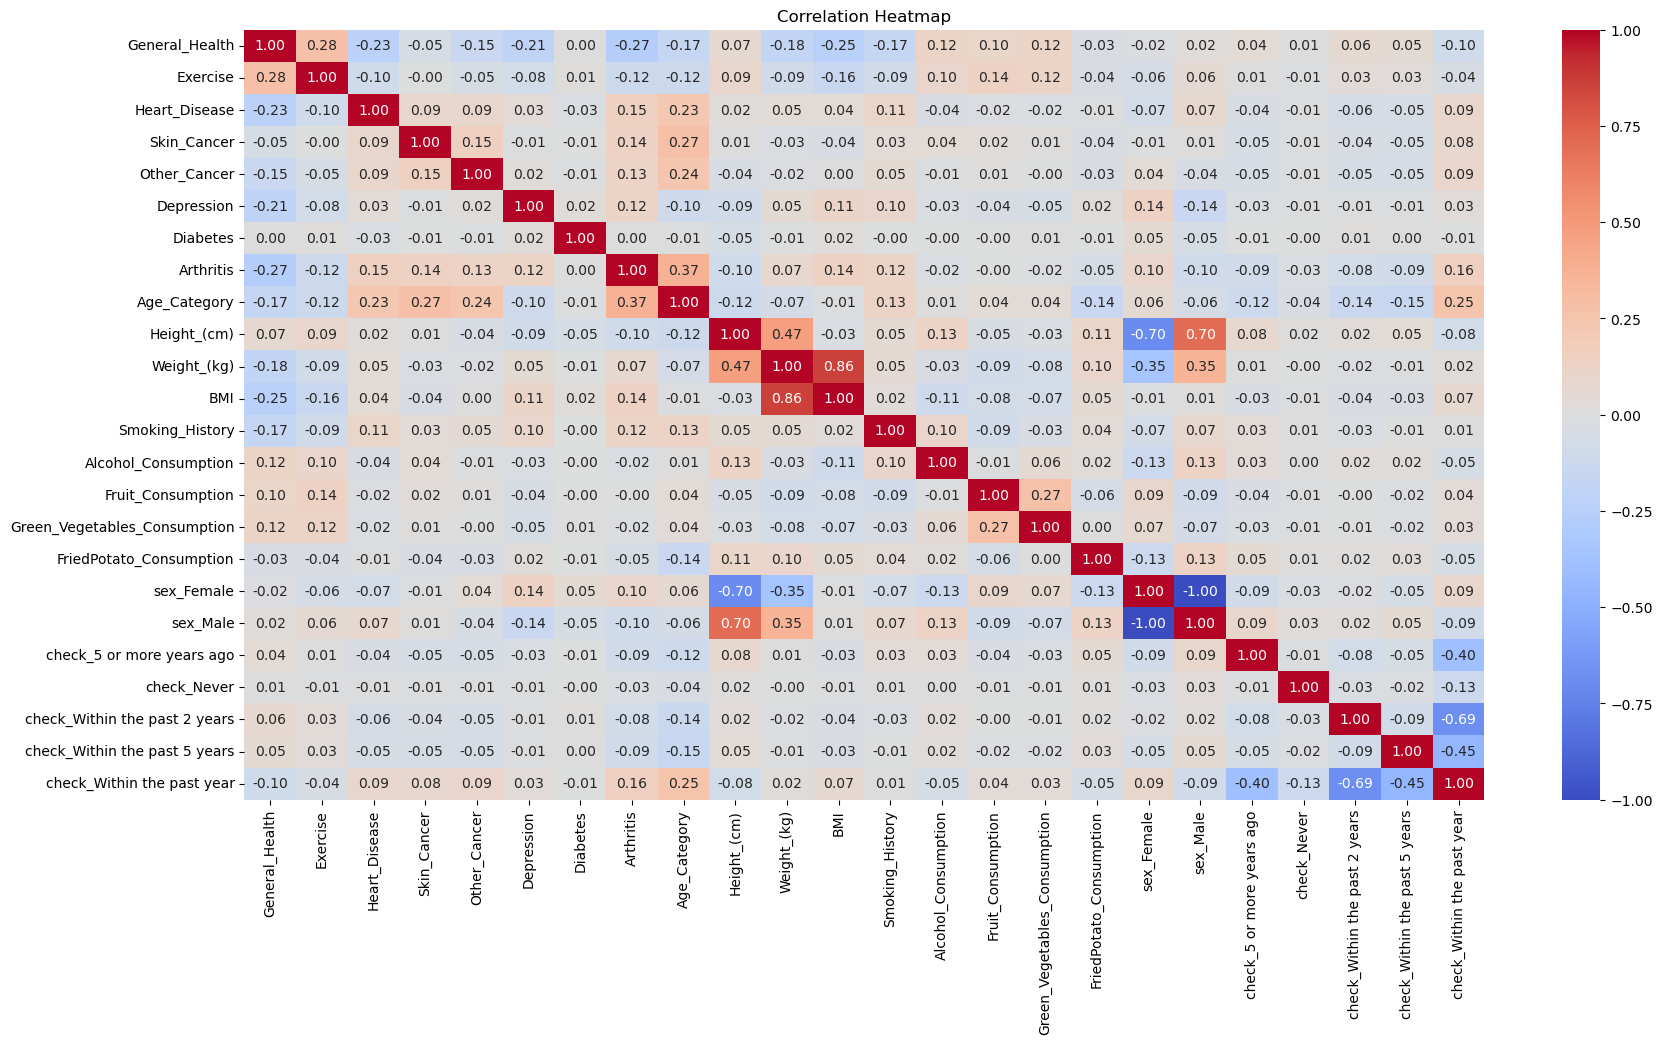

In [25]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

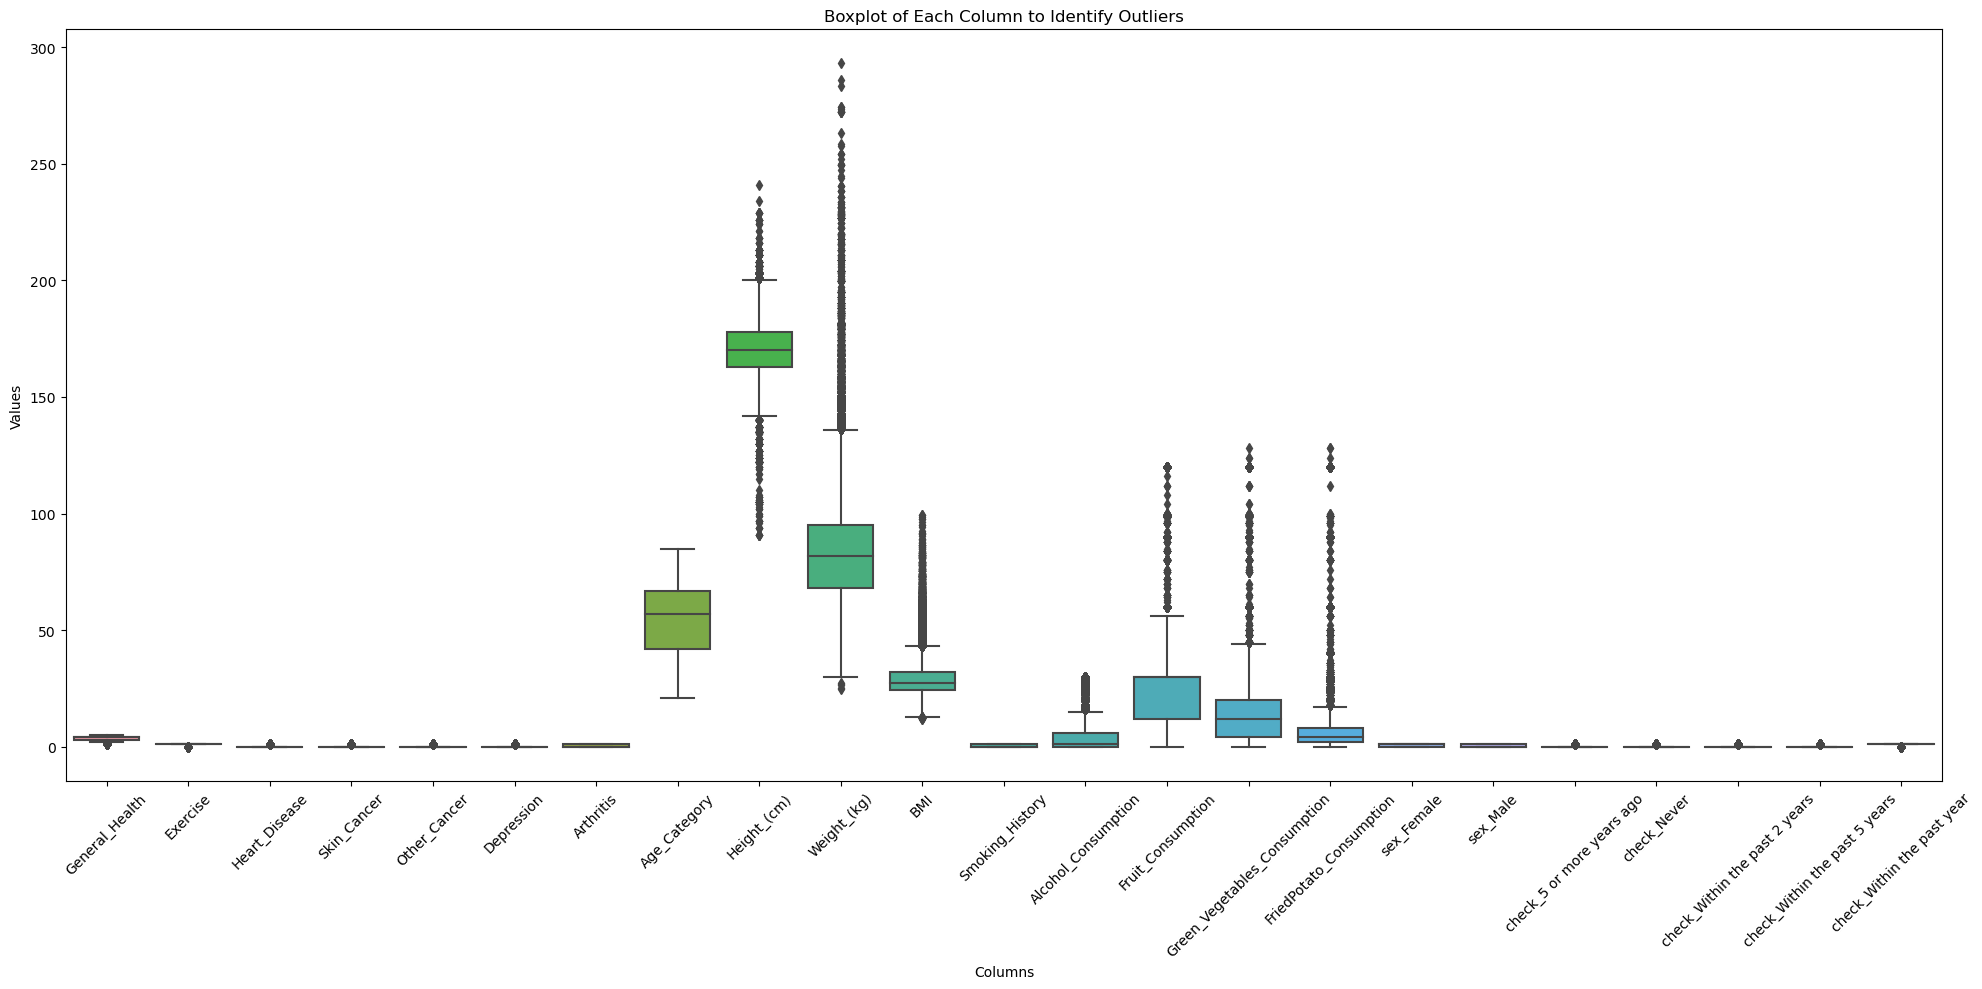

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Each Column to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [27]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# # Example usage:
# # Assuming 'new_df' is your DataFrame and 'Age' is the column with outliers
new_df = remove_outliers_iqr(new_df, 'BMI')
new_df = remove_outliers_iqr(new_df, 'Height_(cm)')
new_df = remove_outliers_iqr(new_df, 'Weight_(kg)')
new_df = remove_outliers_iqr(new_df, 'Alcohol_Consumption')
new_df = remove_outliers_iqr(new_df, 'Fruit_Consumption')
new_df = remove_outliers_iqr(new_df, 'Green_Vegetables_Consumption')
new_df = remove_outliers_iqr(new_df, 'FriedPotato_Consumption')


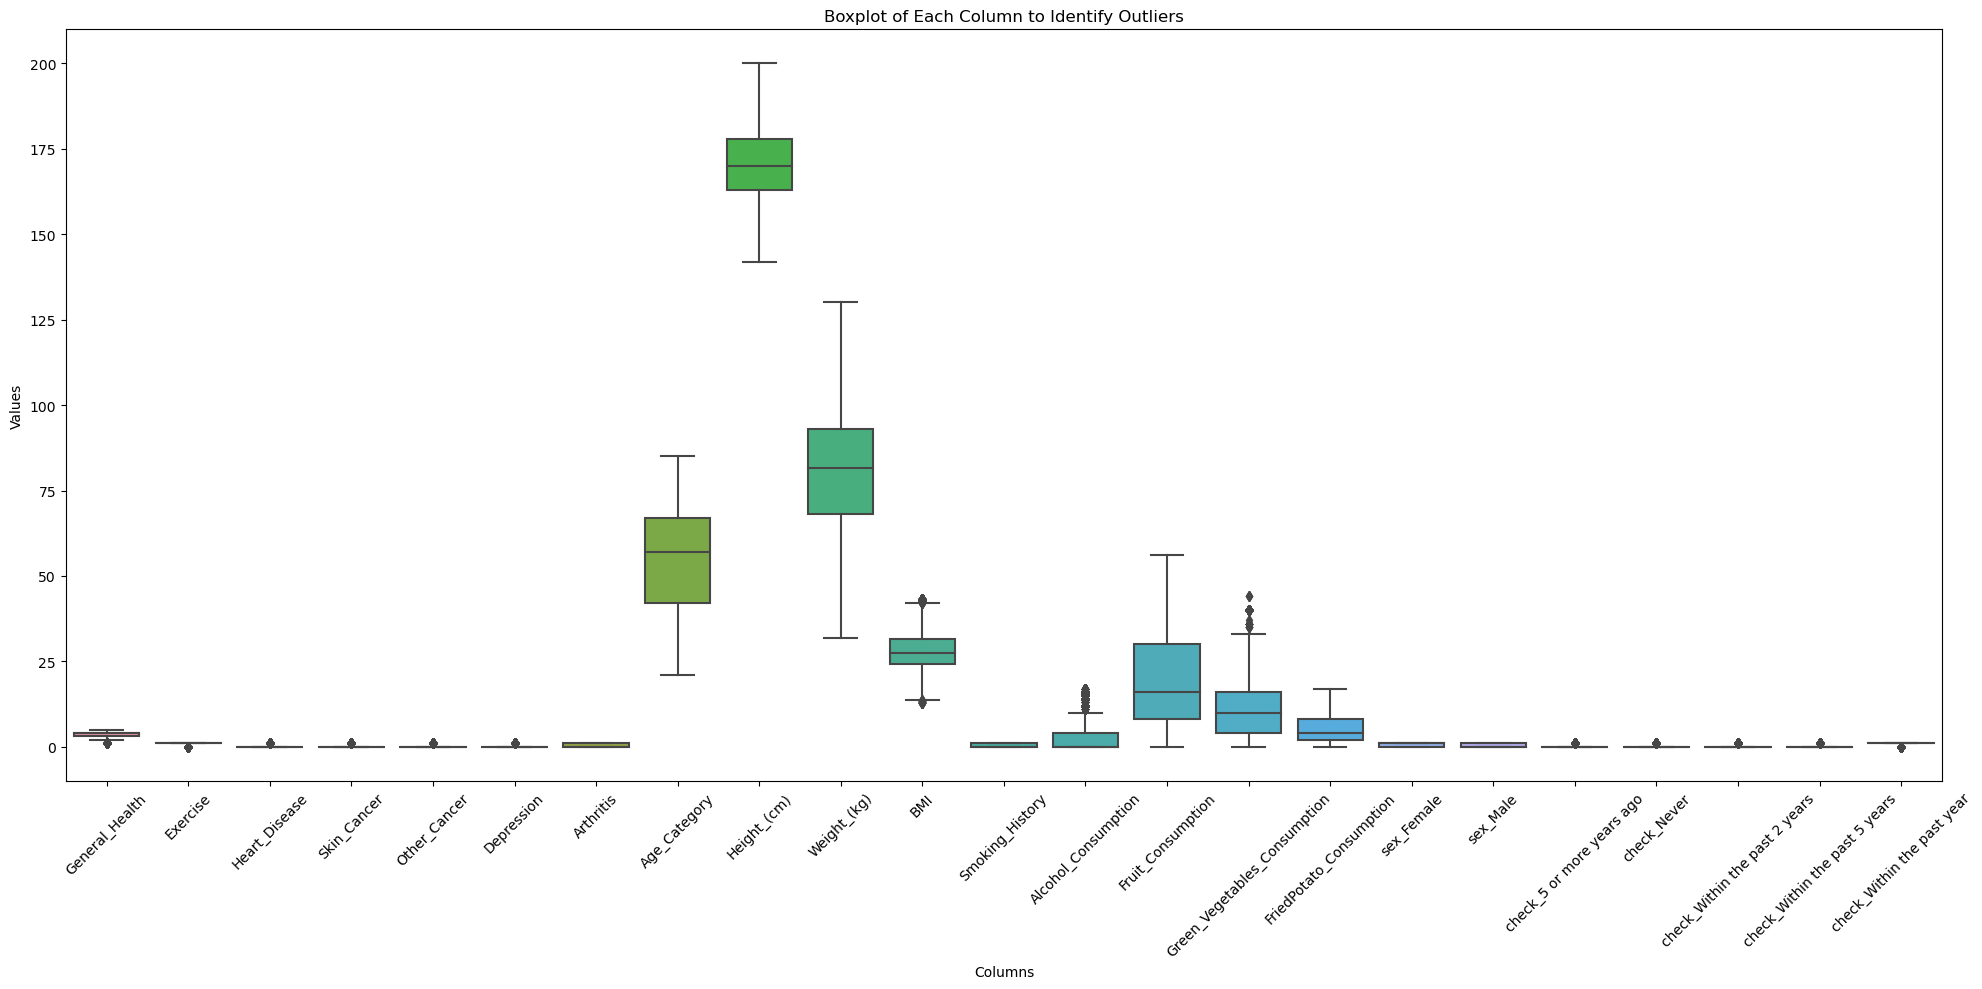

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Each Column to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [29]:
X=new_df.drop('Heart_Disease',axis='columns')
X

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,sex_Female,sex_Male,check_5 or more years ago,check_Never,check_Within the past 2 years,check_Within the past 5 years,check_Within the past year
0,1,0,0,0,0,01,1,72.0,150,32.66,...,30,16,12,1,0,0,0,1,0,0
1,4,0,0,0,0,00,0,72.0,165,77.11,...,30,0,4,1,0,0,0,0,0,1
2,4,1,0,0,0,00,0,62.0,163,88.45,...,12,3,16,1,0,0,0,0,0,1
3,1,1,0,0,0,00,0,77.0,180,93.44,...,30,30,8,0,1,0,0,0,0,1
4,3,0,0,0,0,01,0,85.0,191,88.45,...,8,4,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,3,1,0,0,0,01,0,57.0,168,58.97,...,16,12,0,0,1,0,0,0,1,0
308849,4,1,0,0,0,01,0,27.0,168,81.65,...,30,8,0,0,1,0,0,0,0,1
308851,4,1,0,0,1,10,0,32.0,157,61.23,...,40,8,4,1,0,1,0,0,0,0
308852,4,1,0,0,0,01,0,67.0,183,79.38,...,30,12,0,0,1,0,0,0,0,1


In [30]:
X.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Age_Category', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption', 'sex_Female', 'sex_Male',
       'check_5 or more years ago', 'check_Never',
       'check_Within the past 2 years', 'check_Within the past 5 years',
       'check_Within the past year'],
      dtype='object')

In [31]:
Y=new_df.Heart_Disease
Y

0         0
1         1
2         0
3         1
4         0
         ..
308848    0
308849    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 185970, dtype: int32

                          Feature  Importance
10                            BMI    0.113438
9                     Weight_(kg)    0.109767
7                    Age_Category    0.103111
8                     Height_(cm)    0.099214
14   Green_Vegetables_Consumption    0.096033
15        FriedPotato_Consumption    0.090805
13              Fruit_Consumption    0.085369
0                  General_Health    0.072604
12            Alcohol_Consumption    0.060794
5                        Diabetes    0.043980
6                       Arthritis    0.019426
4                      Depression    0.017876
1                        Exercise    0.016405
11                Smoking_History    0.015560
3                    Other_Cancer    0.014363
2                     Skin_Cancer    0.014102
22     check_Within the past year    0.006741
16                     sex_Female    0.006471
17                       sex_Male    0.005953
20  check_Within the past 2 years    0.003348
21  check_Within the past 5 years 

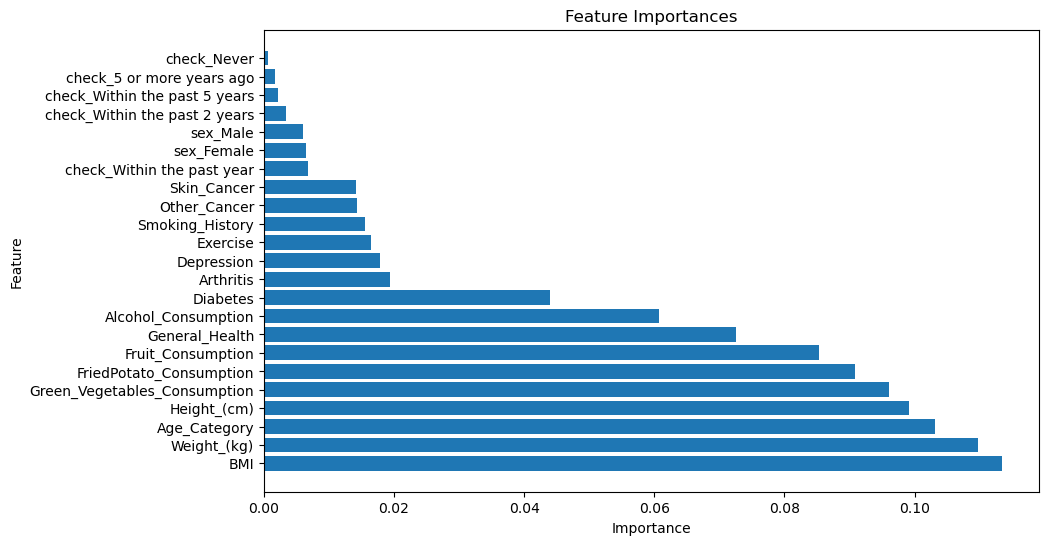

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier
etc_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
etc_model.fit(X_train, y_train)

# Get feature importances
feature_importances = etc_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [33]:
# X=new_df[['BMI','Height_(cm)','Weight_(kg)','Green_Vegetables_Consumption','FriedPotato_Consumption','Age_Category','Fruit_Consumption','General_Health','Alcohol_Consumption']]
# Y=new_df['Heart_Disease']

In [34]:
from imblearn.under_sampling import RandomUnderSampler


# Perform undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, Y)

# Split the resampled data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
# logistic_model_tuned = GridSearchCV(logistic_model, param_grid, cv=5)
# logistic_model_tuned.fit(X_train_scaled, y_train)
# logistic_model = LogisticRegression(
#     penalty='l1',        # Regularization
#     C=1.0,               # Inverse of regularization strength
#     solver='saga',      # Algorithm to use in optimization problem
#     max_iter=100,        # Maximum number of iterations for optimization
#     random_state=42      # Random seed for reproducibility
# )
logistic_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_lr_val = logistic_model.predict(X_val_scaled)
accuracy_lr_val = accuracy_score(y_val, y_pred_lr_val)
print("Logistic Regression Accuracy on Validation Set:", accuracy_lr_val)
print("\nLogistic Regression Classification Report on Validation Set:\n", classification_report(y_val, y_pred_lr_val))

# Model evaluation on test set
y_pred_lr_test = logistic_model.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("\nLogistic Regression Accuracy on Test Set:", accuracy_lr_test)
print("\nLogistic Regression Classification Report on Test Set:\n", classification_report(y_test, y_pred_lr_test))

Logistic Regression Accuracy on Validation Set: 0.7591253747134544

Logistic Regression Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75      2842
           1       0.74      0.79      0.77      2829

    accuracy                           0.76      5671
   macro avg       0.76      0.76      0.76      5671
weighted avg       0.76      0.76      0.76      5671


Logistic Regression Accuracy on Test Set: 0.7588067280228499

Logistic Regression Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1632
           1       0.73      0.79      0.76      1519

    accuracy                           0.76      3151
   macro avg       0.76      0.76      0.76      3151
weighted avg       0.76      0.76      0.76      3151



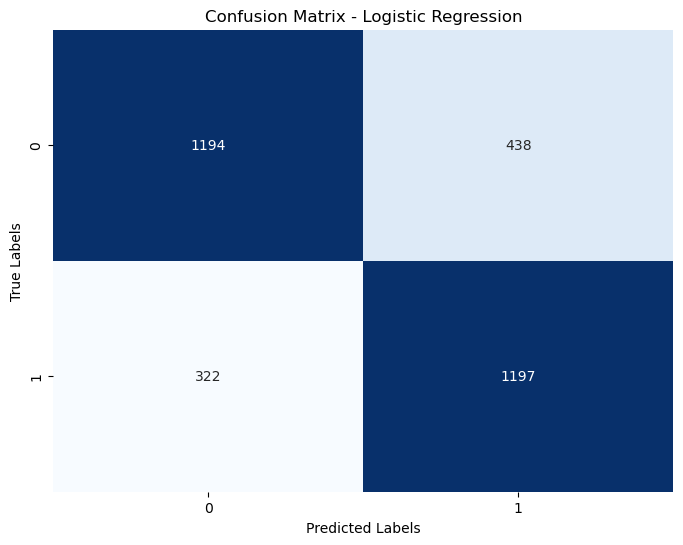

In [36]:
cm_lr = confusion_matrix(y_test, y_pred_lr_test)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


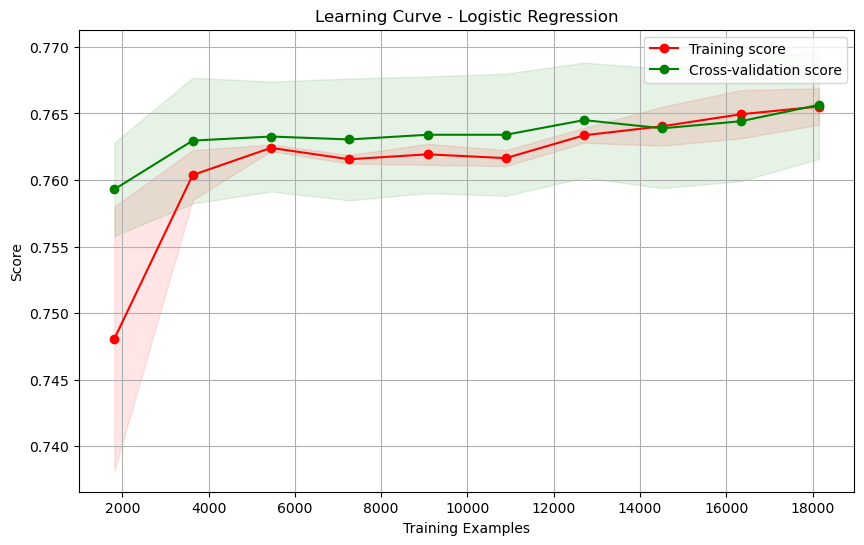

In [37]:
def plot_learning_curve_lgr(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - Logistic Regression")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_lgr(logistic_model, X_train_scaled, y_train)

In [38]:
# Random Forest Classifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train_scaled, y_train)
# Initialize the Random Forest Classifier with reduced complexity
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_rf_val = rf_model.predict(X_val_scaled)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print("Random Forest Classifier Accuracy on Validation Set:", accuracy_rf_val)
print("\nRandom Forest Classifier Classification Report on Validation Set:\n", classification_report(y_val, y_pred_rf_val))

# Model evaluation on test set
y_pred_rf_test = rf_model.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("\nRandom Forest Classifier Accuracy on Test Set:", accuracy_rf_test)
print("\nRandom Forest Classifier Classification Report on Test Set:\n", classification_report(y_test, y_pred_rf_test))

Random Forest Classifier Accuracy on Validation Set: 0.7601833891729853

Random Forest Classifier Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.79      0.70      0.75      2842
           1       0.73      0.82      0.77      2829

    accuracy                           0.76      5671
   macro avg       0.76      0.76      0.76      5671
weighted avg       0.76      0.76      0.76      5671


Random Forest Classifier Accuracy on Test Set: 0.7651539193906697

Random Forest Classifier Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      1632
           1       0.73      0.82      0.77      1519

    accuracy                           0.77      3151
   macro avg       0.77      0.77      0.76      3151
weighted avg       0.77      0.77      0.76      3151



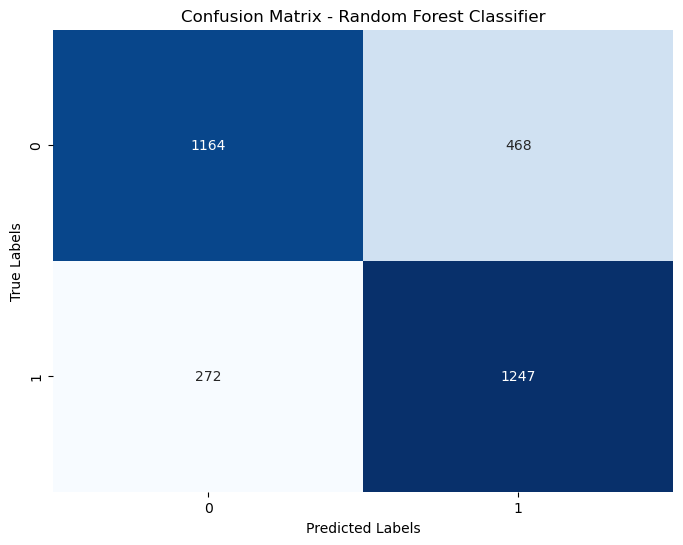

In [39]:
cm_rf = confusion_matrix(y_test, y_pred_rf_test)

# Confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


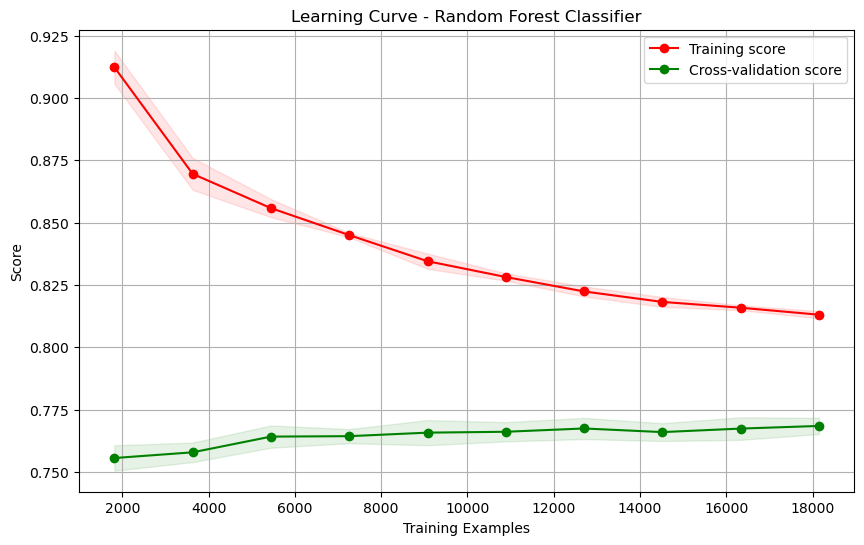

In [40]:
def plot_learning_curve_rfc(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - Random Forest Classifier")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_rfc(rf_model, X_train_scaled, y_train)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_knn_val = knn_model.predict(X_val_scaled)
accuracy_knn_val = accuracy_score(y_val, y_pred_knn_val)
print("KNN Accuracy on Validation Set:", accuracy_knn_val)
print("\nKNN Classification Report on Validation Set:\n", classification_report(y_val, y_pred_knn_val))

# Model evaluation on test set
y_pred_knn_test = knn_model.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("\nKNN Accuracy on Test Set:", accuracy_knn_test)
print("\nKNN Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn_test))

KNN Accuracy on Validation Set: 0.7199788397108093

KNN Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      2842
           1       0.71      0.74      0.73      2829

    accuracy                           0.72      5671
   macro avg       0.72      0.72      0.72      5671
weighted avg       0.72      0.72      0.72      5671


KNN Accuracy on Test Set: 0.7086639162170739

KNN Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      1632
           1       0.68      0.74      0.71      1519

    accuracy                           0.71      3151
   macro avg       0.71      0.71      0.71      3151
weighted avg       0.71      0.71      0.71      3151



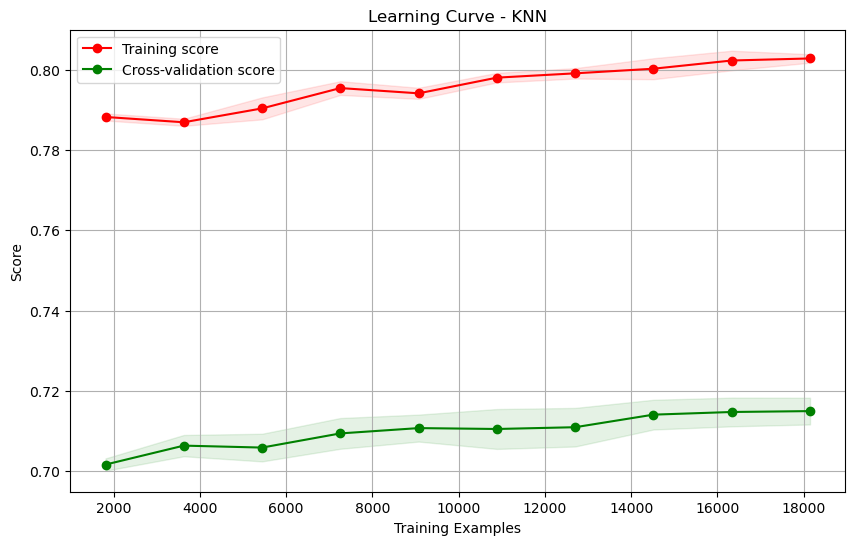

In [42]:
def plot_learning_curve_knn(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - KNN")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_knn(knn_model, X_train_scaled, y_train)

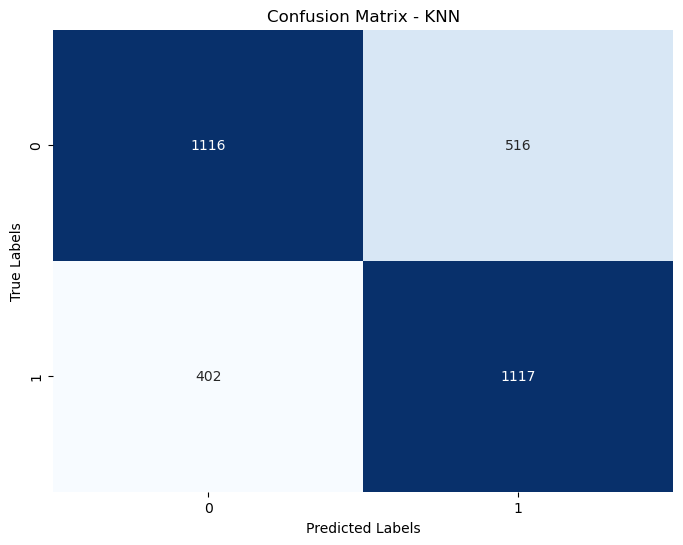

In [43]:
knn_pred = knn_model.predict(X_test_scaled)  # Replace knn_model with your KNN model
knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

In [44]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam

# # Define the model architecture
# model = Sequential()
# model.add(Dense(units=500, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# model.add(Dropout(0.5))  # Adding dropout regularization
# model.add(Dense(units=500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model with early stopping
# history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), 
#                     batch_size=64, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])


# # Evaluate on validation set
# val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
# print("Validation loss:", val_loss)
# print("Validation accuracy:", val_accuracy)

# # Evaluate on test set
# test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
# print("Test loss:", test_loss)
# print("Test accuracy:", test_accuracy)


In [45]:
# def plot_learning_curve_ann(history):
#     train_loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     train_accuracy = history.history['accuracy']
#     val_accuracy = history.history['val_accuracy']
    
#     epochs = range(1, len(train_loss) + 1)
    
#     plt.figure(figsize=(12, 6))
    
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, train_loss, 'r', label='Training Loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation Loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.grid(True)

#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
#     plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()
# # history=model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val));
# # Assuming 'history' is the history object returned by model.fit()
# plot_learning_curve_ann(history)

In [46]:


# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000,  # Number of trees (boosting iterations)
                                     learning_rate=0.1,  # Learning rate
                                     depth=6,  # Depth of the trees
                                     random_state=42,  # Random seed for reproducibility
                                     verbose=0)  # Set to 0 for no output during training

# Train the model
catboost_model.fit(X_train_scaled, y_train, eval_set=(X_val_scaled, y_val), early_stopping_rounds=50, verbose=100)

# Model evaluation
train_accuracy = catboost_model.score(X_train_scaled, y_train)
val_accuracy = catboost_model.score(X_val_scaled, y_val)
test_accuracy = catboost_model.score(X_test_scaled, y_test)

print("CatBoost Model Training Accuracy:", train_accuracy)
print("CatBoost Model Validation Accuracy:", val_accuracy)
print("CatBoost Model Test Accuracy:", test_accuracy)

0:	learn: 0.6557685	test: 0.6554279	best: 0.6554279 (0)	total: 166ms	remaining: 2m 45s
100:	learn: 0.4661393	test: 0.4851742	best: 0.4851322 (97)	total: 1.04s	remaining: 9.26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4851322439
bestIteration = 97

Shrink model to first 98 iterations.
CatBoost Model Training Accuracy: 0.7812555104919767
CatBoost Model Validation Accuracy: 0.7640627755245989
CatBoost Model Test Accuracy: 0.7664233576642335


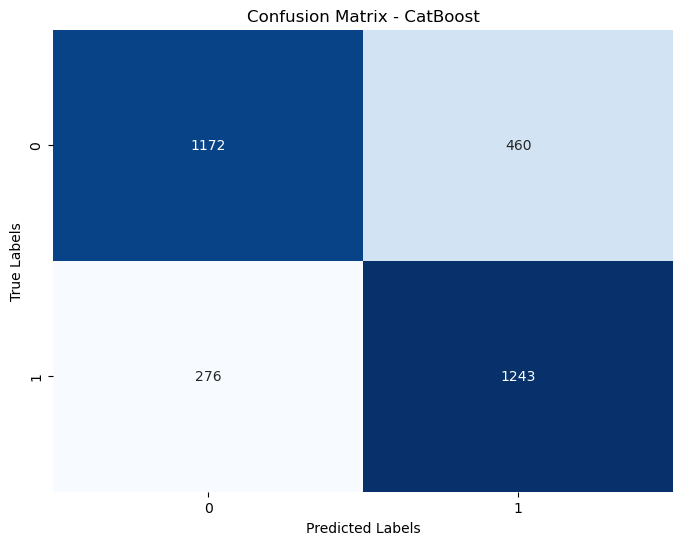

In [47]:
catboost_pred = catboost_model.predict(X_test_scaled)
catboost_cm = confusion_matrix(y_test, catboost_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(catboost_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CatBoost')
plt.show()